In [1]:
import numpy as np
import pandas as pd 
import astropy.io.ascii as ascii
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
import PIL
from PIL import Image
import sys
import matplotlib.image as mp

# Defining the functions needed to make things easier

In [2]:
def match1(poi, catalogue):
    
    x=poi['X_WORLD']
    y=poi['Y_WORLD']

    coord1 = SkyCoord(ra=[x]*u.degree, dec=[y]*u.degree)
    coord2 = SkyCoord(ra=catalogue['X_WORLD']*u.degree, dec=catalogue['Y_WORLD']*u.degree)

    idx, d2d, d3d = coord1.match_to_catalog_sky(coord2)
    max_sep = 1.0 * u.arcsec
    sep_constraint = d2d < max_sep
    global catalogue_match
    catalogue_match = catalogue.iloc[idx[sep_constraint]]
    
    
def match2(catalogue1, catalogue2):
    xworld1 = catalogue1['X_WORLD']
    yworld1 = catalogue1['Y_WORLD']

    xworld2 = catalogue2['X_WORLD']
    yworld2 = catalogue2['Y_WORLD']

    coord1 = SkyCoord(ra=xworld1*u.degree, dec=yworld1*u.degree)
    coord2 = SkyCoord(ra=xworld2*u.degree, dec=yworld2*u.degree)

    idx, d2d, d3d = coord1.match_to_catalog_sky(coord2)

    max_sep = 1.0 * u.arcsec

    sep_constraint = d2d < max_sep

    global data1_12_matches
    try: data1_12_matches = catalogue1[sep_constraint]
    except IndexError: 
        pass 
    
    global data2_12_matches
    data2_12_matches = catalogue2.iloc[idx[sep_constraint]]

    
def match3(catalogue1, catalogue2, catalogue3):
    xworld1 = catalogue1['X_WORLD']
    yworld1 = catalogue1['Y_WORLD']

    xworld2 = catalogue2['X_WORLD']
    yworld2 = catalogue2['Y_WORLD']
    
    xworld3 = catalogue3['X_WORLD']
    yworld3 = catalogue3['Y_WORLD']
    
    coord1 = SkyCoord(ra=xworld1*u.degree, dec=yworld1*u.degree)
    coord2 = SkyCoord(ra=xworld2*u.degree, dec=yworld2*u.degree)

    
    idx, d2d, d3d = coord1.match_to_catalog_sky(coord2)
    
    max_sep = 1.0 * u.arcsec

    sep_constraint = d2d < max_sep
    
    data1_12_matches = catalogue1[sep_constraint]
    data2_12_matches = catalogue2.iloc[idx[sep_constraint]]
    
    xworld1_12 = data1_12_matches['X_WORLD']
    yworld1_12 = data1_12_matches['Y_WORLD']
    
    coord1_12 = SkyCoord(ra=xworld1_12*u.degree, dec=yworld1_12*u.degree)
    coord3 = SkyCoord(ra=xworld3*u.degree, dec=yworld3*u.degree)
    
    idx, d2d, d3d = coord1_12.match_to_catalog_sky(coord3)
    
    max_sep = 1.0 * u.arcsec

    sep_constraint = d2d < max_sep
    
    global data1_123_matches
    data1_123_matches = data1_12_matches[sep_constraint]
    global data2_123_matches
    data2_123_matches = data2_12_matches[sep_constraint]
    global data3_123_matches
    data3_123_matches = catalogue3.iloc[idx[sep_constraint]]

# Matching the g band data over the 3 days

#### We'll start off with the subtraction images

In [3]:
#reading in the cat files 
Subtraction_image08g = ascii.read("GRB210605A5_20210608_g_stack_ext5.resamp_sub_withnans_SUB.cat")
Subtraction_image09g = ascii.read("GRB210605A5_20210609_g_stack_ext5.resamp_sub_withnans_SUB.cat")
Subtraction_image10g = ascii.read("GRB210605A5_20210610_g_stack_ext5.resamp_sub_withnans_SUB.cat")

#initialising the panda dataframes
subtraction08g = pd.DataFrame(Subtraction_image08g.as_array())
subtraction09g = pd.DataFrame(Subtraction_image09g.as_array())
subtraction10g = pd.DataFrame(Subtraction_image10g.as_array())

#filtering out the 'fake' data
subtraction08gf = subtraction08g[subtraction08g['MAG_AUTO'] < 20]
subtraction09gf = subtraction09g[subtraction09g['MAG_AUTO'] < 20]
subtraction10gf = subtraction10g[subtraction10g['MAG_AUTO'] < 20]

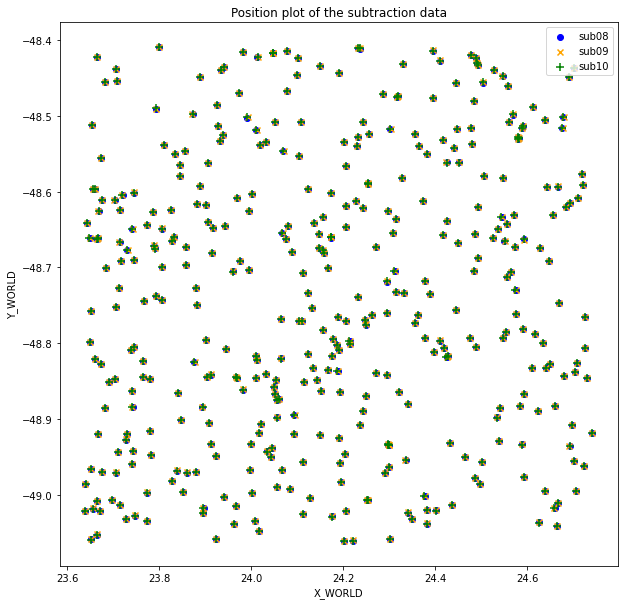

In [4]:
match3(subtraction08gf, subtraction09gf, subtraction10gf)
# match3(science08gf, science09gf, science10gf)

xworld1_123 = data1_123_matches['X_WORLD']
yworld1_123 = data1_123_matches['Y_WORLD']

xworld2_123 = data2_123_matches['X_WORLD']
yworld2_123 = data2_123_matches['Y_WORLD']

xworld3_123 = data3_123_matches['X_WORLD']
yworld3_123 = data3_123_matches['Y_WORLD']

plt.figure(figsize = (10,10))
plt.title('Position plot of the subtraction data')
plt.xlabel('X_WORLD')
plt.ylabel('Y_WORLD')
plt.scatter(xworld1_123,yworld1_123,color = 'b', marker = 'o', label = 'sub08')
plt.scatter(xworld2_123,yworld2_123, color = 'orange', marker = 'x', label = 'sub09')
plt.scatter(xworld3_123, yworld3_123,color = 'g', marker = '+', s = 50, label = 'sub10')
plt.legend()

# Now for matching the science data

In [5]:
Science_image08g = ascii.read("GRB210605A5_20210608_g_stack_ext5.resamp_withnans_SCI_CORRECTED.cat")
Science_image09g = ascii.read("GRB210605A5_20210609_g_stack_ext5.resamp_withnans_SCI_CORRECTED.cat")
Science_image10g = ascii.read("GRB210605A5_20210610_g_stack_ext5.resamp_withnans_SCI_CORRECTED.cat")

science08g = pd.DataFrame(Science_image08g.as_array())
science09g = pd.DataFrame(Science_image09g.as_array())
science10g = pd.DataFrame(Science_image10g.as_array())

science08gf = science08g[science08g['MAG_AUTO'] < 25]
science09gf = science09g[science09g['MAG_AUTO'] < 25]
science10gf = science10g[science10g['MAG_AUTO'] < 25]

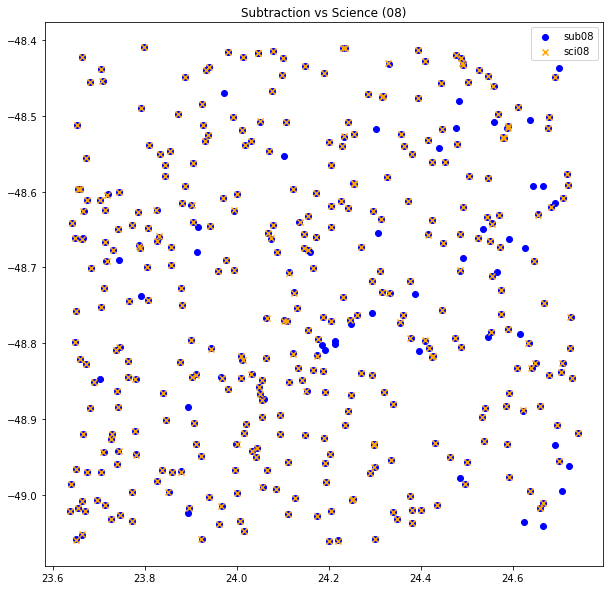

In [6]:
match2(data1_123_matches, science08gf)

xworld2_12 = data2_12_matches['X_WORLD']
yworld2_12 = data2_12_matches['Y_WORLD']

plt.figure(figsize = (10,10))
plt.title('Subtraction vs Science (08)')
plt.scatter(xworld1_123,yworld1_123,color = 'b', marker = 'o', label = 'sub08')
plt.scatter(xworld2_12,yworld2_12,color = 'orange', marker = 'x', label = 'sci08')
plt.legend()

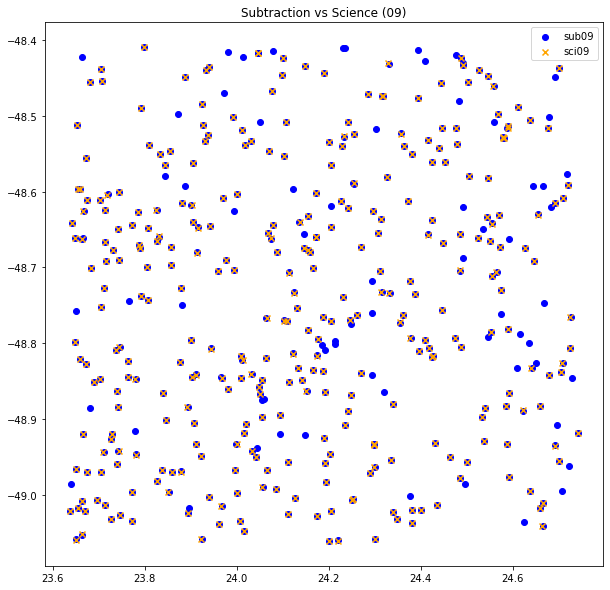

In [7]:
match2(data2_123_matches, science09gf)

xworld2_12 = data2_12_matches['X_WORLD']
yworld2_12 = data2_12_matches['Y_WORLD']

plt.figure(figsize = (10,10))
plt.title('Subtraction vs Science (09)')
plt.scatter(xworld1_123,yworld1_123,color = 'b', marker = 'o', label = 'sub09')
plt.scatter(xworld2_12,yworld2_12,color = 'orange', marker = 'x', label = 'sci09')
plt.legend()

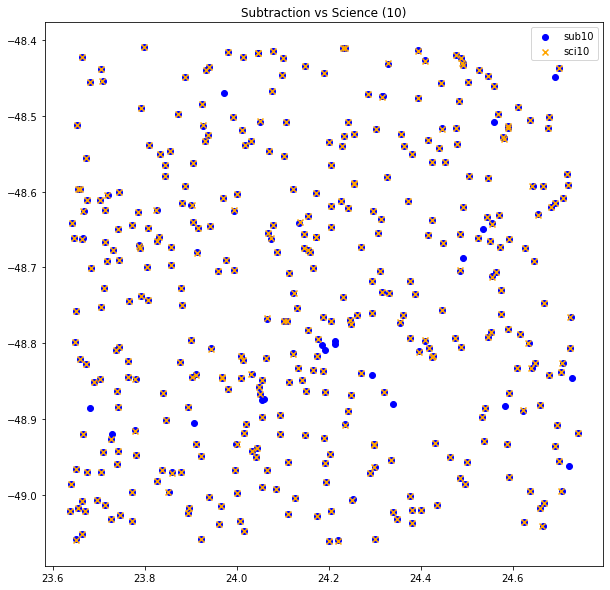

In [8]:
match2(data3_123_matches, science10gf)

xworld2_12 = data2_12_matches['X_WORLD']
yworld2_12 = data2_12_matches['Y_WORLD']

plt.figure(figsize = (10,10))
plt.title('Subtraction vs Science (10)')
plt.scatter(xworld3_123,yworld3_123,color = 'b', marker = 'o', label = 'sub10')
plt.scatter(xworld2_12,yworld2_12,color = 'orange', marker = 'x', label = 'sci10')
plt.legend()

The differences between the sciences and subtractions are normal and its better to look at DS9 or the stamps for why this is the case. This is usually just SE screwing up or a weird artifact

# End result of the matching:

In [9]:
data1_123_matches #subtraction08
# data2_123_matches #subtraction09 
# data3_123_matches #subtraction10

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
1,2,731.4904,69.95326,2.272,439.4568,28.84985,4808.6987,18.1275,24.201414,-49.061333,...,-0.392960,2.010,1.491,-38.80,51.20,34,8.95,0.000663,58,0.258
2,3,565.6078,88.24388,2.585,269.0930,28.96760,4638.3315,28.0253,24.220661,-49.060597,...,-0.191445,2.628,1.784,6.82,-83.21,34,12.98,0.000961,52,0.321
4,5,1089.6600,86.78520,2.608,513.0654,28.82033,9680.9355,31.8874,23.651005,-49.059079,...,0.858309,2.812,1.610,20.70,-68.98,53,12.75,0.000944,73,0.427
7,8,1297.0790,84.29800,2.117,827.2916,28.93821,7265.4102,44.2881,23.923882,-49.059101,...,0.285726,2.673,1.599,60.13,-29.75,57,8.75,0.000647,74,0.402
15,16,673.6740,115.22220,3.928,206.2112,28.93821,3932.8682,51.7681,24.300354,-49.058788,...,0.201239,2.491,1.375,6.76,-83.32,20,11.09,0.000821,42,0.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12827,12828,649.2682,72.34551,2.235,359.1207,28.96760,4046.9932,7996.1460,24.286281,-48.470704,...,-0.673087,2.143,1.463,47.57,-42.47,31,9.37,0.000694,42,0.317
12830,12831,950.9474,95.20261,2.083,657.0572,28.96760,9466.8408,8195.8486,23.681296,-48.454861,...,-0.017541,2.571,2.143,89.58,-0.03,65,8.63,0.000639,101,0.167
12845,12846,726.7049,68.72591,2.048,488.0315,28.93821,9244.7373,8426.4346,23.706247,-48.437898,...,-0.203119,1.920,1.543,5.03,-84.62,39,7.73,0.000572,46,0.197
12869,12870,519884.4000,197.96520,5.853,51474.8900,28.82033,4501.2734,8802.8740,24.235501,-48.411018,...,-0.605267,5.040,4.749,70.02,-20.02,1122,10.10,0.000747,1380,0.058


# Making the g band points for the light curve
## This is where we'll also pick ou source of interest over the 3 days for both the subtraction and science data

In [10]:
lc_g_sci = []
lc_g_sci = pd.DataFrame(lc_g_sci)

source_number = 4 #picking the source in for the light curves

#this gets a point from the subtraction data and finds the closest point from the science data and repeats for the 3 days
match1(data1_123_matches.iloc[source_number,8:10], science08gf)
lc_g_sci = lc_g_sci.append(catalogue_match) 
match1(data1_123_matches.iloc[source_number,8:10], science09gf)
lc_g_sci = lc_g_sci.append(catalogue_match)
match1(data1_123_matches.iloc[source_number,8:10], science10gf)
lc_g_sci = lc_g_sci.append(catalogue_match)
lc_g_sci #this contains all of the points in the science images that matches with the point in the subtraction image

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
6,7.0,2415.726,45.32652,4.392,534.0479,9.130355,3932.7437,50.4447,24.300368,-49.058886,...,30.01255,3.654,3.456,-27.94,62.01,209.0,8.33,0.000616,266.0,0.054
119,120.0,2128.458,42.65173,4.253,494.4178,8.460851,3970.3149,109.0528,24.300361,-49.058890,...,27.07247,3.569,3.318,-27.26,62.69,193.0,8.03,0.000594,262.0,0.070
102,103.0,1832.585,33.95815,3.036,715.2977,9.021608,3998.3335,81.8972,24.300399,-49.058870,...,32.00858,2.886,2.491,13.45,-76.63,133.0,5.15,0.000381,173.0,0.137


## Subtraction data:

In [11]:
lc_g_sub = []
lc_g_sub = pd.DataFrame(lc_g_sub)
lc_g_sub = lc_g_sub.append(data1_123_matches.iloc[source_number])
lc_g_sub = lc_g_sub.append(data2_123_matches.iloc[source_number])
lc_g_sub = lc_g_sub.append(data3_123_matches.iloc[source_number])
lc_g_sub

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
15,16.0,673.674,115.22220,3.928,206.2112,28.93821,3932.8682,51.7681,24.300354,-49.058788,...,0.201239,2.491,1.375,6.76,-83.32,20.0,11.09,0.000821,42.0,0.448
119,120.0,1139.219,89.35817,2.257,685.4604,28.83473,3969.8843,112.1860,24.300409,-49.058659,...,-0.031005,2.585,1.881,-30.05,59.90,61.0,9.36,0.000693,96.0,0.273
53,54.0,685.300,97.67497,2.217,402.9116,35.43618,3999.2900,83.2475,24.300290,-49.058770,...,-0.443576,1.636,1.109,-34.54,55.41,22.0,7.53,0.000557,37.0,0.322


In [12]:
#now we've got the points for the light curve (g band)
mag_g_sci = lc_g_sci['MAG_AUTO']
mag_g_sub = lc_g_sub['MAG_AUTO']
print(mag_g_sci)
print(mag_g_sub)

6      20.34245
119    20.42360
102    20.39215
Name: MAG_AUTO, dtype: float64
15     17.9289
119    17.3585
53     17.9103
Name: MAG_AUTO, dtype: float64


# Next step is to do this for the i band

In [13]:
#reading in the cat files" 
Subtraction_image08i = ascii.read("GRB210605A5_20210608_i_stack_ext5.resamp_sub_withnans_SUB.cat")
Subtraction_image09i = ascii.read("GRB210605A5_20210609_i_stack_ext5.resamp_sub_withnans_SUB.cat")
Subtraction_image10i = ascii.read("GRB210605A5_20210610_i_stack_ext5.resamp_sub_withnans_SUB.cat")

#initialising the panda dataframes
subtraction08i = pd.DataFrame(Subtraction_image08i.as_array())
subtraction09i = pd.DataFrame(Subtraction_image09i.as_array())
subtraction10i = pd.DataFrame(Subtraction_image10i.as_array())

#filtering out the 'fake' data
subtraction08if = subtraction08i[subtraction08i['MAG_AUTO'] < 20]
subtraction09if = subtraction09i[subtraction09i['MAG_AUTO'] < 20]
subtraction10if = subtraction10i[subtraction10i['MAG_AUTO'] < 20]

#matching the 3 subtraction images
match3(subtraction08if, subtraction09if, subtraction10if)

Science_image08i = ascii.read("GRB210605A5_20210608_i_stack_ext5.resamp_withnans_SCI_CORRECTED.cat")
Science_image09i = ascii.read("GRB210605A5_20210609_i_stack_ext5.resamp_withnans_SCI_CORRECTED.cat")
Science_image10i = ascii.read("GRB210605A5_20210610_i_stack_ext5.resamp_withnans_SCI_CORRECTED.cat")

science08i = pd.DataFrame(Science_image08i.as_array())
science09i = pd.DataFrame(Science_image09i.as_array())
science10i = pd.DataFrame(Science_image10i.as_array())

science08if = science08i[science08i['MAG_AUTO'] < 25]
science09if = science09i[science09i['MAG_AUTO'] < 25]
science10if = science10i[science10i['MAG_AUTO'] < 25]

# Getting the i band points for the light curve 

In [14]:
lc_i_sci = []
lc_i_sci = pd.DataFrame(lc_i_sci)
match1(data1_123_matches.iloc[source_number,8:10], science08if)
lc_i_sci = lc_i_sci.append(catalogue_match)
match1(data1_123_matches.iloc[source_number,8:10], science09if)
lc_i_sci = lc_i_sci.append(catalogue_match)
match1(data1_123_matches.iloc[source_number,8:10], science10if)
lc_i_sci = lc_i_sci.append(catalogue_match)
lc_i_sci

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
213,214.0,38187.10,198.5636,3.024,14869.25,47.86434,1622.4343,47.1769,24.558175,-49.060832,...,1220.171,3.033,2.919,-42.35,47.51,256.0,5.14,0.000381,303.0,0.038
144,145.0,37293.75,224.6246,3.397,12287.58,50.58875,1661.9266,82.6231,24.558177,-49.060835,...,1449.366,3.245,3.102,-42.32,47.54,264.0,5.85,0.000433,306.0,0.044
366,367.0,34588.41,150.1545,2.141,20759.59,47.03203,1665.0026,84.7186,24.558177,-49.060831,...,1195.873,2.442,2.165,-49.02,40.84,166.0,3.51,0.000260,222.0,0.113


In [15]:
lc_i_sub = []
lc_i_sub = pd.DataFrame(lc_i_sub)
lc_i_sub = lc_i_sub.append(data1_123_matches.iloc[source_number])
lc_i_sub = lc_i_sub.append(data2_123_matches.iloc[source_number])
lc_i_sub = lc_i_sub.append(data3_123_matches.iloc[source_number])
lc_i_sub

,NUMBER,FLUX_AUTO,FLUXERR_AUTO,FLUX_RADIUS,FLUX_APER,FLUXERR_APER,X_IMAGE,Y_IMAGE,X_WORLD,Y_WORLD,...,BACKGROUND,A_IMAGE,B_IMAGE,THETA_IMAGE,THETA_SKY,ISOAREA_IMAGE,FWHM_IMAGE,FWHM_WORLD,ISOAREAF_IMAGE,ELLIPTICITY
20,21.0,1049.5930,79.58254,1.652,971.5908,33.03210,1619.6357,46.3753,24.558492,-49.060890,...,0.006073,2.025,1.465,-88.38,1.33,43.0,5.85,0.000433,55.0,0.276
45,46.0,794.1912,84.59661,2.030,542.6418,35.67311,1659.5983,82.3068,24.558440,-49.060858,...,0.218355,2.035,1.394,-74.85,14.91,35.0,7.34,0.000543,44.0,0.315
101,102.0,1657.8200,76.01015,1.291,2026.4710,37.42828,1663.0865,84.5673,24.558394,-49.060841,...,0.327513,1.910,1.121,-77.87,11.87,38.0,4.06,0.000301,47.0,0.413


In [16]:
#checking points for both bands
mag_i_sci = lc_i_sci['MAG_AUTO']
mag_i_sub = lc_i_sub['MAG_AUTO']
print(mag_i_sci)
print(mag_i_sub)
print(mag_g_sci)
print(mag_g_sub)

213    18.89400
144    18.89220
366    18.88755
Name: MAG_AUTO, dtype: float64
20     17.4474
45     17.7502
101    16.9512
Name: MAG_AUTO, dtype: float64
6      20.34245
119    20.42360
102    20.39215
Name: MAG_AUTO, dtype: float64
15     17.9289
119    17.3585
53     17.9103
Name: MAG_AUTO, dtype: float64


# Now for the g-i band

In [17]:
mag_gm_sci = mag_g_sci.reset_index()
mag_gm_sci = mag_gm_sci['MAG_AUTO']
mag_im_sci = mag_i_sci.reset_index()
mag_im_sci = mag_im_sci['MAG_AUTO']

mag_gm_sub = mag_g_sub.reset_index()
mag_gm_sub = mag_gm_sub['MAG_AUTO']
mag_im_sub = mag_i_sub.reset_index()
mag_im_sub = mag_im_sub['MAG_AUTO']

print(mag_gm_sci)
print(mag_gm_sub)
print(mag_im_sci)
print(mag_im_sub)

mag_diff_sci = mag_gm_sci-mag_im_sci
mag_diff_sub = mag_gm_sub - mag_im_sub

print(mag_diff_sci)
print(mag_diff_sub)

0    20.34245
1    20.42360
2    20.39215
Name: MAG_AUTO, dtype: float64
0    17.9289
1    17.3585
2    17.9103
Name: MAG_AUTO, dtype: float64
0    18.89400
1    18.89220
2    18.88755
Name: MAG_AUTO, dtype: float64
0    17.4474
1    17.7502
2    16.9512
Name: MAG_AUTO, dtype: float64
0    1.44845
1    1.53140
2    1.50460
Name: MAG_AUTO, dtype: float64
0    0.4815
1   -0.3917
2    0.9591
Name: MAG_AUTO, dtype: float64


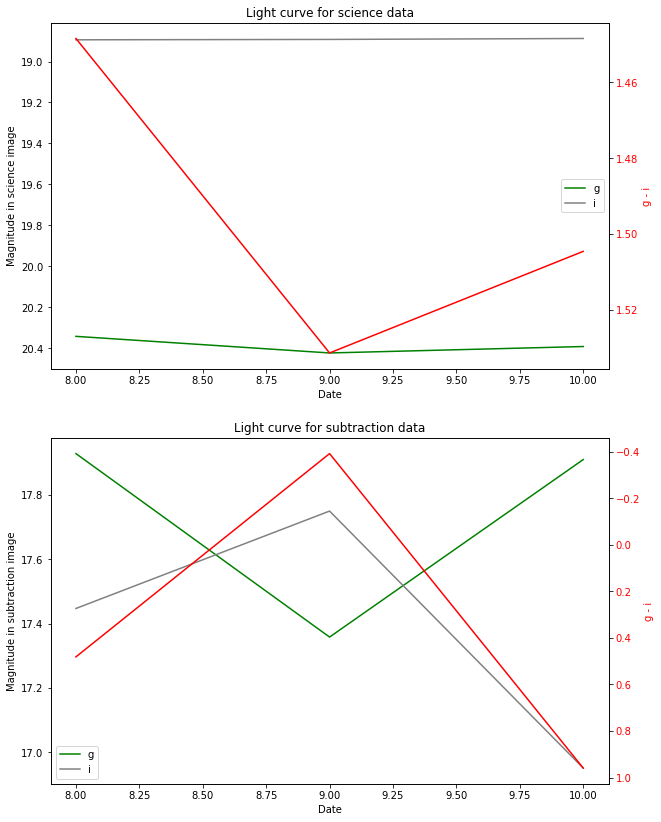

In [18]:
time = [8,9,10]


fig, ax = plt.subplots(2, figsize = (10,14), sharey = False)
plt.subplot(2,1,1)
ax[0].set_title('Light curve for science data')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Magnitude in science image', color = 'black')
plt.gca().invert_yaxis()
ax[0].plot(time, mag_g_sci, color ='g', label = 'g')
ax[0].plot(time,mag_i_sci, color = 'grey', label = 'i')
plt.legend()

ax0 = ax[0].twinx()
ax0.set_ylabel('g - i', color = 'r')  # we already handled the x-label with ax0
ax0.tick_params(axis='y', labelcolor = 'r')
plt.gca().invert_yaxis()
ax0.plot(time, mag_diff_sci, color = 'r', label = 'g-i')



#subtraction light curve
plt.subplot(2,1,2)
ax[1].set_title('Light curve for subtraction data')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Magnitude in subtraction image', color = 'black')
ax[1].plot(time, mag_g_sub, color ='g', label = 'g')
ax[1].plot(time, mag_i_sub, color = 'grey', label = 'i')

plt.legend()

ax1 = ax[1].twinx()  # initiates a second axes that shares the same x-axis
ax1.set_ylabel('g - i', color = 'r')  # we already handled the x-label with ax1
ax1.tick_params(axis='y', labelcolor = 'r')
plt.gca().invert_yaxis()
ax1.plot(time, mag_diff_sub, color = 'r', label = 'g-i')


In [19]:
#science data
print('Science Data')
print()
print(mag_g_sci)
print(mag_i_sci)
print(mag_diff_sci)
print('-------------------')
#subtraction data
print('Subtraction Data')
print()
print(mag_g_sub)
print(mag_i_sub)
print(mag_diff_sub)

Science Data

6      20.34245
119    20.42360
102    20.39215
Name: MAG_AUTO, dtype: float64
213    18.89400
144    18.89220
366    18.88755
Name: MAG_AUTO, dtype: float64
0    1.44845
1    1.53140
2    1.50460
Name: MAG_AUTO, dtype: float64
-------------------
Subtraction Data

15     17.9289
119    17.3585
53     17.9103
Name: MAG_AUTO, dtype: float64
20     17.4474
45     17.7502
101    16.9512
Name: MAG_AUTO, dtype: float64
0    0.4815
1   -0.3917
2    0.9591
Name: MAG_AUTO, dtype: float64
